In [14]:
import pandas as pd
df=pd.read_csv("tested.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
df.shape

(418, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
df['Age']=imputer.fit_transform(df[['Age']])

In [13]:
miss_ind=df['Cabin'].isnull()
df.loc[miss_ind,'Cabin']="Unknown"
df.loc[miss_ind,'Cabin']

5      Unknown
6      Unknown
7      Unknown
8      Unknown
9      Unknown
        ...   
412    Unknown
413    Unknown
415    Unknown
416    Unknown
417    Unknown
Name: Cabin, Length: 322, dtype: object

In [19]:
imput=SimpleImputer(strategy='most_frequent')
df['Embarked']=imput.fit_transform(df[['Embarked']]).ravel()

In [20]:
import seaborn as sns 
import matplotlib.pyplot as plt

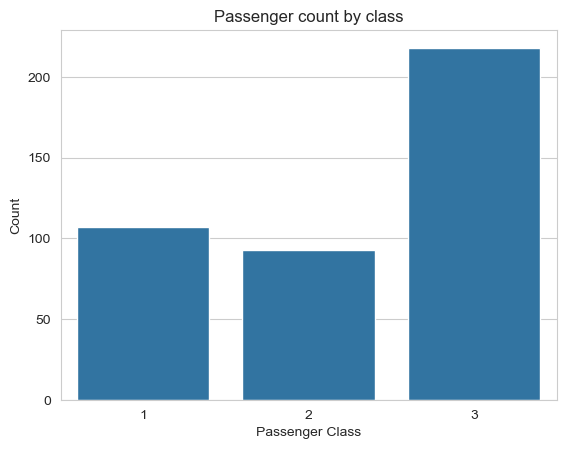

In [43]:
sns.set_style('whitegrid')
sns.countplot(df,x='Pclass')
plt.title("Passenger count by class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

In [26]:
fs=df[(df['Sex']=='female') & (df['Survived']==1)]
fs['Name']

1                     Wilkes, Mrs. James (Ellen Needs)
4         Hirvonen, Mrs. Alexander (Helga E Lindqvist)
6                                 Connolly, Miss. Kate
8            Abrahim, Mrs. Joseph (Sophie Halaut Easu)
12       Snyder, Mrs. John Pillsbury (Nelle Stevenson)
                            ...                       
409                          Peacock, Miss. Treasteall
410                             Naughton, Miss. Hannah
411    Minahan, Mrs. William Edward (Lillian E Thorpe)
412                     Henriksson, Miss. Jenny Lovisa
414                       Oliva y Ocana, Dona. Fermina
Name: Name, Length: 152, dtype: object

In [27]:
ps=df[(df['Age']<18)&(df['Pclass']==3)]
ps

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.00,0,0,7538,9.2250,NaN,S
21,913,0,3,"Olsen, Master. Artur Karl",male,9.00,0,1,C 17368,3.1708,NaN,S
55,947,0,3,"Rice, Master. Albert",male,10.00,4,1,382652,29.1250,NaN,Q
60,952,0,3,"Dika, Mr. Mirko",male,17.00,0,0,349232,7.8958,NaN,S
80,972,0,3,"Boulos, Master. Akar",male,6.00,1,1,2678,15.2458,NaN,C
104,996,1,3,"Thomas, Mrs. Alexander (Thamine Thelma"")""",female,16.00,1,1,2625,8.5167,NaN,C
117,1009,1,3,"Sandstrom, Miss. Beatrice Irene",female,1.00,1,1,PP 9549,16.7000,G6,S
125,1017,1,3,"Cribb, Miss. Laura Alice",female,17.00,0,1,371362,16.1000,NaN,S
140,1032,1,3,"Goodwin, Miss. Jessie Allis",female,10.00,5,2,CA 2144,46.9000,NaN,S
154,1046,0,3,"Asplund, Master. Filip Oscar",male,13.00,4,2,347077,31.3875,NaN,S


In [28]:
os=df[(df['Age']>40)&(df['Pclass']==1)]
os

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,903,0,1,"Jones, Mr. Charles Cresson",male,46.0,0,0,694,26.0000,NaN,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
20,912,0,1,"Rothschild, Mr. Martin",male,55.0,1,0,PC 17603,59.4000,NaN,C
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S
44,936,1,1,"Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)",female,45.0,1,0,11753,52.5542,D19,S
46,938,0,1,"Chevre, Mr. Paul Romaine",male,45.0,0,0,PC 17594,29.7000,A9,C
48,940,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C
67,959,0,1,"Moore, Mr. Clarence Bloomfield",male,47.0,0,0,113796,42.4000,NaN,S
69,961,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S


In [29]:
sur=os[os['Survived']==1]
sur

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
44,936,1,1,"Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)",female,45.0,1,0,11753,52.5542,D19,S
48,940,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C
69,961,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
77,969,1,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.0,2,0,11770,25.7000,C101,S
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
100,992,1,1,"Stengel, Mrs. Charles Emil Henry (Annie May Mo...",female,43.0,1,0,11778,55.4417,C116,C
114,1006,1,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.0,1,0,PC 17483,221.7792,C55 C57,S
179,1071,1,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64.0,0,2,PC 17756,83.1583,E45,C


In [31]:
mp=df[(df['Sex']=='male')&(df['Fare']>100)]
mp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
64,956,0,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
75,967,0,1,"Keeping, Mr. Edwin",male,32.5,0,0,113503,211.5000,C132,C
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
142,1034,0,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
196,1088,0,1,"Spedden, Master. Robert Douglas",male,6.0,0,2,16966,134.5000,E34,C
202,1094,0,1,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C
217,1109,0,1,"Wick, Mr. George Dennick",male,57.0,1,1,36928,164.8667,NaN,S
242,1134,0,1,"Spedden, Mr. Frederic Oakley",male,45.0,1,1,16966,134.5000,E34,C
252,1144,0,1,"Clark, Mr. Walter Miller",male,27.0,1,0,13508,136.7792,C89,C
306,1198,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S


In [32]:
em=df[(df['Embarked']=='C')&(df['Pclass']==2)]
em

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
15,907,1,2,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",female,24.0,1,0,SC/PARIS 2167,27.7208,NaN,C
51,943,0,2,"Pulbaum, Mr. Franz",male,27.0,0,0,SC/PARIS 2168,15.0333,NaN,C
54,946,0,2,"Mangiavacchi, Mr. Serafino Emilio",male,NaN,0,0,SC/A.3 2861,15.5792,NaN,C
110,1002,0,2,"Stanton, Mr. Samuel Ward",male,41.0,0,0,237734,15.0458,NaN,C
220,1112,1,2,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C
264,1156,0,2,"Portaluppi, Mr. Emilio Ilario Giuseppe",male,30.0,0,0,C.A. 34644,12.7375,NaN,C
296,1188,1,2,"Laroche, Miss. Louise",female,1.0,1,2,SC/Paris 2123,41.5792,NaN,C
301,1193,0,2,"Malachard, Mr. Noel",male,NaN,0,0,237735,15.0458,D,C
361,1253,1,2,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0,1,1,S.C./PARIS 2079,37.0042,NaN,C
369,1261,0,2,"Pallas y Castello, Mr. Emilio",male,29.0,0,0,SC/PARIS 2147,13.8583,NaN,C


In [34]:
sbs=df[df['SibSp']>2]
sbs

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
53,945,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S
55,947,0,3,"Rice, Master. Albert",male,10.0,4,1,382652,29.1250,NaN,Q
140,1032,1,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9000,NaN,S
145,1037,0,3,"Vander Planke, Mr. Julius",male,31.0,3,0,345763,18.0000,NaN,S
154,1046,0,3,"Asplund, Master. Filip Oscar",male,13.0,4,2,347077,31.3875,NaN,S
188,1080,1,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.5500,NaN,S
214,1106,1,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.7750,NaN,S
360,1252,0,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.5500,NaN,S
379,1271,0,3,"Asplund, Master. Carl Edgar",male,5.0,4,2,347077,31.3875,NaN,S
389,1281,0,3,"Palsson, Master. Paul Folke",male,6.0,3,1,349909,21.0750,NaN,S


In [36]:
no_sur=df[(df['Survived']==0)&(df['SibSp']==0)&(df['Parch']==0)]
no_sur['Name']

0                                  Kelly, Mr. James
2                         Myles, Mr. Thomas Francis
3                                  Wirz, Mr. Albert
5                        Svensson, Mr. Johan Cervin
10                                 Ilieff, Mr. Ylio
                           ...                     
403                          Carrau, Mr. Jose Pedro
405    Nourney, Mr. Alfred (Baron von Drachstedt")"
413                              Spector, Mr. Woolf
415                    Saether, Mr. Simon Sivertsen
416                             Ware, Mr. Frederick
Name: Name, Length: 185, dtype: object

In [38]:
survivor=df[df['Survived']==1]
old_survivor=survivor.sort_values(by='Age',ascending=False).head(5)
old_survivor[['Name','Age']]

,Name,Age
96,"Cavendish, Mrs. Tyrell William (Julia Florence...",76.0
179,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",64.0
305,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",64.0
114,"Straus, Mrs. Isidor (Rosalie Ida Blun)",63.0
69,"Fortune, Mrs. Mark (Mary McDougald)",60.0


In [41]:
fare=df[df['Fare']==0]
fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
266,1158,0,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S
372,1264,0,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S


In [42]:
from sklearn.model_selection import train_test_split
x=df.drop('Survived',axis=1)
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("Training set:",x_train.shape)
print("Testing set:",x_test.shape)

Training set: (334, 11)
Testing set: (84, 11)
